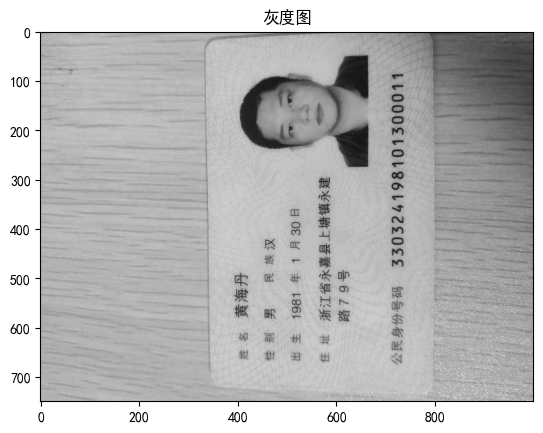

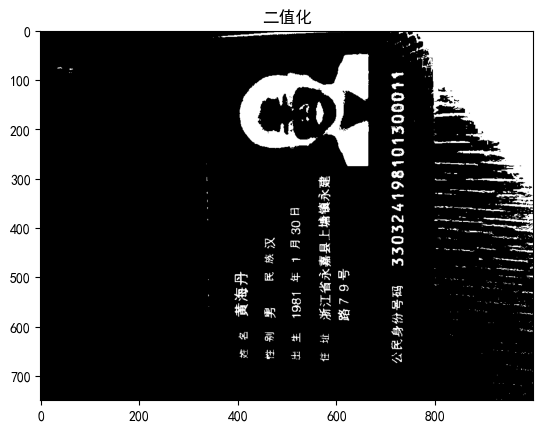

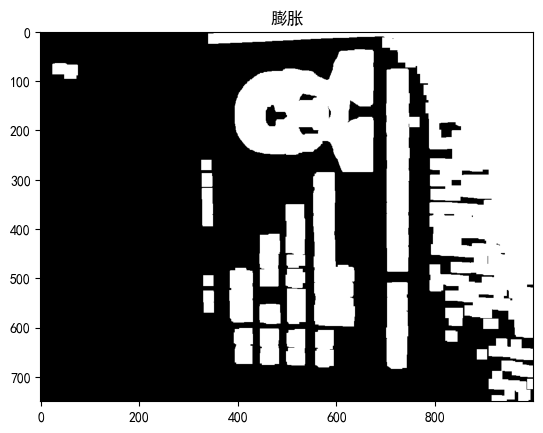

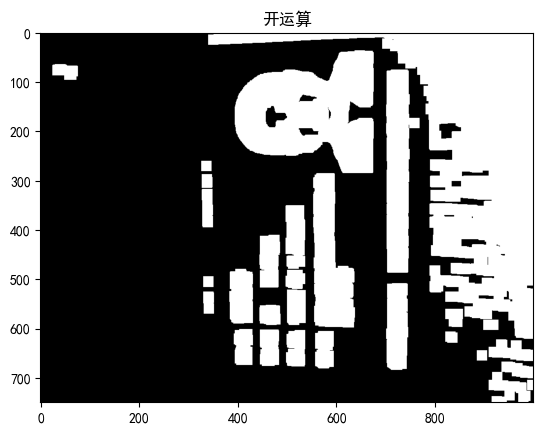

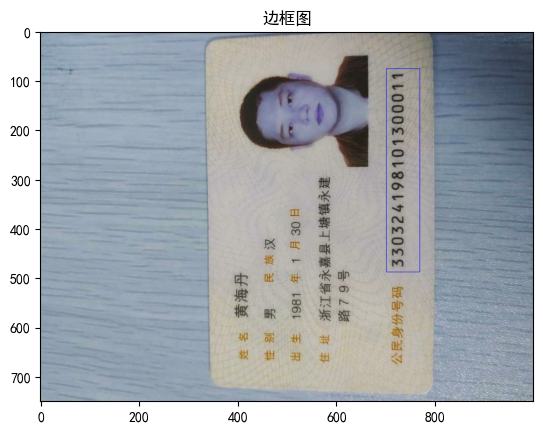

702 76 68 412


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from utils import common
isDebug=True
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# img=cv2.imread("./idcard1.jpg")
# img=cv2.imread("./idcard2.png")
img=cv2.imread("./images/6.jpg")
# img=cv2.imread("./images/test/un/downloadIdCardImage-1.jpg")
# 设置高斯滤波器的大小为5
kernel_size = 5
# blur_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
common.show(gray,"灰度图",cmap="gray",debug=isDebug)

_,dst=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
common.show(dst,"二值化",cmap="gray",debug=isDebug)
kernel = np.ones((3, 3), np.uint8)

dilate = cv2.dilate(dst, kernel, iterations=10)
common.show(dilate, "膨胀",cmap="gray",debug=isDebug)
#進行开运算，腐蚀掉噪点，然后进行膨胀
morph_open = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel)
common.show(morph_open,"开运算",cmap="gray",debug=isDebug)
# 轮廓检测
contours, hierarchy = cv2.findContours(morph_open, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
imgc=img.copy()
maxarea=[];
whminratio=6
whmaxratio=12
# 遍历所有轮廓
for cnt in contours:
    # 进行多边形拟合
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(cnt)
    if((float(w)/h>whminratio and float(w)/h<whmaxratio) or (float(h)/w>whminratio and float(h)/w<whmaxratio)):
        #cv2.rectangle(imgc, (x, y), (x + w, y + h), (0, 0, 255), 2)
        maxarea.append((x, y, w, h))
    # 绘制矩形框
# data_areas = sorted(maxarea, key=lambda x: max([float(x[2])/x[3],float(x[3])/x[2]]),reverse=True)
data_areas = sorted(maxarea, key=lambda x: x[2]*x[3],reverse=True)
select_k=3
if(len(data_areas)>0):
    x, y, w, h = data_areas[0]
    cv2.rectangle(imgc, (x, y), (x + w, y + h), (0, 0, 255), 1)
    common.show(imgc,"边框图",cmap="gray",debug=True)
    crop_img = img[y:y+h, x:x+w]
    print(x, y, w, h)
    cv2.imwrite("idcardsfz.jpg",crop_img)